A wind turbine manufacturer is deciding where to locate its factories. Management believes they should open 5 factories. You are tasked with locating them. Recognizing that wind turbines are huge and very costly to transport, you decide to minimize transportation cost. (This is a simplification.) You have identified a list of 100 possible factory locations and 1000 demand points across the USA. 
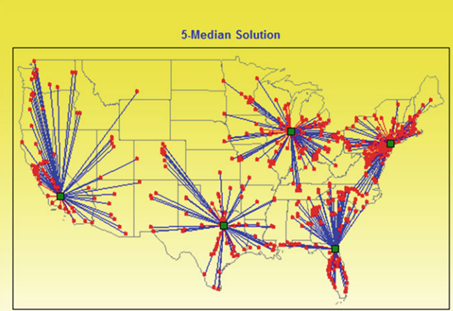

In [1]:
k = 5                    # desired number of factories
fac = list(range(100))   # candidate factory locations
dem = list(range(1000))  # demand points

In [2]:
# For convenience, pick the factory locations at random
import random

fac_x = [ random.random() for i in fac ]
fac_y = [ random.random() for i in fac ]

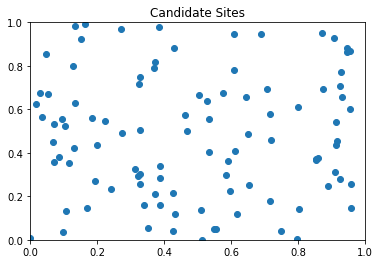

In [3]:
# Draw the factory locations
import matplotlib.pyplot as plt

plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(fac_x, fac_y)
plt.title('Candidate Sites')
plt.show()

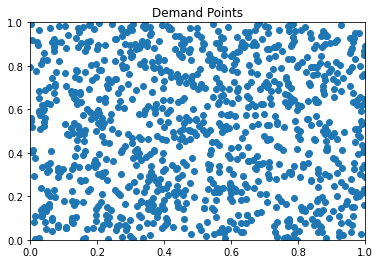

In [4]:
# Draw the demand point locations
dem_x = [ random.random() for i in dem ]
dem_y = [ random.random() for i in dem ]

plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(dem_x, dem_y)
plt.title('Demand Points')
plt.show()

In [5]:
# Suppose that cost equals rectilinear distance
def rect_dist(x1,y1,x2,y2):
    return abs(x1-x2) + abs(y1-y2)

cost = { (i,j) : rect_dist( fac_x[i], fac_y[i], dem_x[j], dem_y[j] ) for i in fac for j in dem }

In [6]:
# # Suppose that cost equals Chebyshev distance
# def cheb_dist(x1,y1,x2,y2):
#     return max( abs(x1-x2), abs(y1-y2) )

# cost = { (i,j) : cheb_dist( fac_x[i], fac_y[i], dem_x[j], dem_y[j] ) for i in fac for j in dem }

In [7]:
# # Suppose that cost equals Euclidean distance
# import math
# def eucl_dist(x1,y1,x2,y2):
#     return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

# cost = { (i,j) : eucl_dist( fac_x[i], fac_y[i], dem_x[j], dem_y[j] ) for i in fac for j in dem }

In [8]:
import gurobipy as gp
from gurobipy import GRB

In [9]:
# create model 
m = gp.Model()

# create variables, x[i,j] = 1 if facility i serves demand point j
x = m.addVars(fac, dem)

# create variables, y[i] = 1 if locate a facility at site i
y = m.addVars(fac, vtype=GRB.BINARY)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-01-01


In [10]:
# Objective: minimize transportation cost
m.setObjective( gp.quicksum( cost[i,j] * x[i,j] for i in fac for j in dem), GRB.MINIMIZE )

In [11]:
# Constraint: build factories at k sites
m.addConstr( gp.quicksum(y) == k )

# Constraints: each demand point should be covered by (assigned to) a factory
m.addConstrs( gp.quicksum( x[i,j] for i in fac ) == 1 for j in dem )

# Constraints: if no factory is built at site i, it can serve no demand point
m.addConstrs( x[i,j] <= y[i] for i in fac for j in dem )

m.update()

In [12]:
# force Gurobi to use concurrent method (primal simplex, dual simplex, barrier all at the same time!)
m.Params.Method = 3

# solve
m.optimize()

Set parameter Method to value 3
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 101001 rows, 100100 columns and 300100 nonzeros
Model fingerprint: 0x300934d4
Variable types: 100000 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-03, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 616.4267027
Presolve time: 0.34s
Presolved: 101001 rows, 100100 columns, 300100 nonzeros
Variable types: 100000 continuous, 100 integer (100 binary)

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.02s

Barrier statistics:
 Dense cols : 100
 AA' NZ     : 2.001e+05
 Factor NZ  : 4.176e+05 (roughly 90 MB of memory)
 Factor Ops : 1.394e+07 (less than 1 second per iteration)
 Threads    : 3

                  Obj

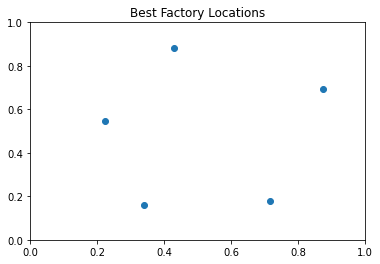

In [13]:
medians = [ i for i in fac if y[i].x > 0.5 ]
medians_x = [ fac_x[i] for i in medians ]
medians_y = [ fac_y[i] for i in medians ]

plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(medians_x, medians_y)
plt.title('Best Factory Locations')
plt.show()

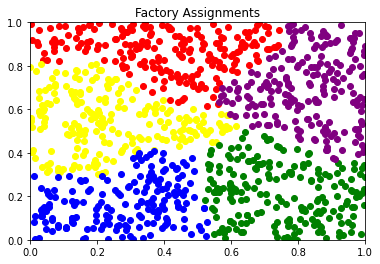

In [14]:
# Draw the factory assignments
pallette = ['red', 'yellow', 'green', 'blue', 'purple']

for p in range(k):
    i = medians[p]
    assigned = [ j for j in dem if x[i,j].x > 0.5 ]
    assigned_x = [ dem_x[j] for j in assigned ]
    assigned_y = [ dem_y[j] for j in assigned ]
    plt.scatter(assigned_x, assigned_y, color=pallette[p])

plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Factory Assignments')
plt.show()